In [1]:
## Following two statements will allow to display multiple variables one after the other without using print statement
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

snacks_sales = pd.read_csv('Snacks_Data.csv')
snacks_sales['Month'] = pd.DatetimeIndex(snacks_sales['Date']).month
Quarter_Mapping = {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3, 10:4, 11:4, 12:4}
snacks_sales['Quarter'] = snacks_sales['Month'].map(Quarter_Mapping)

snacks_sales.shape
snacks_sales.head()

(1095, 12)

Period      daywk weekend      Date  Cakes  Pies  Cookies  Smoothies  \
0       1    Tuesday       N  1/1/2015     79    46      518         60   
1       2  Wednesday       N  1/2/2015     91    50      539        161   
2       3   Thursday       N  1/3/2015     47    60      222        166   
3       4     Friday       N  1/4/2015     89    64      734        153   
4       5   Saturday       Y  1/5/2015    112    73      764        240   

   Coffee Promotion  Month  Quarter  
0     233        No      1        1  
1     427        No      1        1  
2     347        No      1        1  
3     358        No      1        1  
4     392        No      1        1

## Relational Plots, sns.relplot()
- scatterplot(), kind='scatter' default option
- lineplot(), kind='line'

### lineplot()

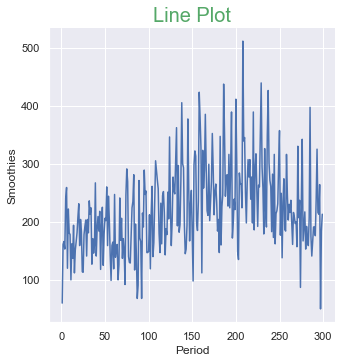

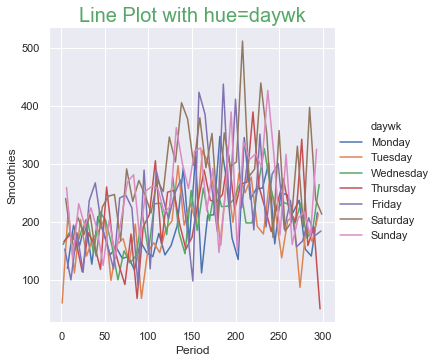

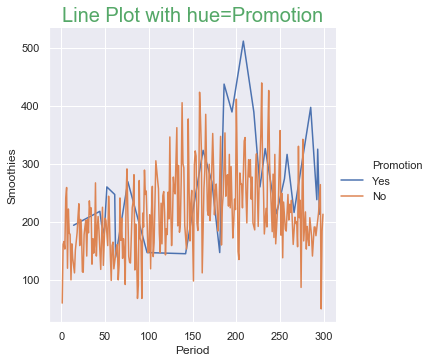

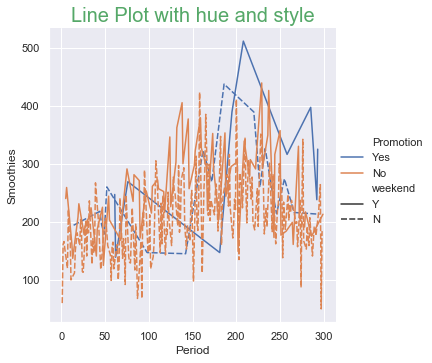

In [3]:
sns.set(style='darkgrid')   #{darkgrid, whitegrid, dark, white, ticks}

sns.relplot(x='Period', y='Smoothies', data=snacks_sales.query("Period < 300"), kind='line')
plt.title('Line Plot', size=20, color='g')

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.relplot(x='Period', y='Smoothies', hue='daywk', hue_order=day_order,
            data=snacks_sales.query("Period < 300"), kind='line')
plt.title('Line Plot with hue=daywk', size=20, color='g')

sns.relplot(x='Period', y='Smoothies', hue='Promotion', hue_order=["Yes", "No"],
            data=snacks_sales.query("Period < 300"), kind='line')
plt.title('Line Plot with hue=Promotion', size=20, color='g')

sns.relplot(x='Period', y='Smoothies', hue='Promotion', hue_order=["Yes", "No"], style='weekend', 
            style_order=["Y", "N"], kind='line', data=snacks_sales.query("Period < 300"))
plt.title('Line Plot with hue and style', size=20, color='g')

plt.show();

C:\Anaconda3\envs\keras35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


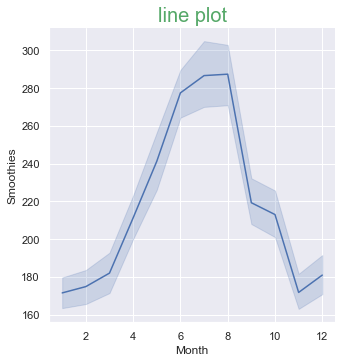

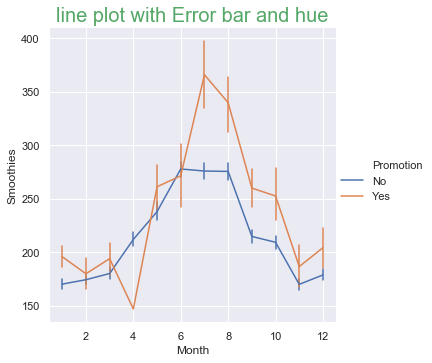

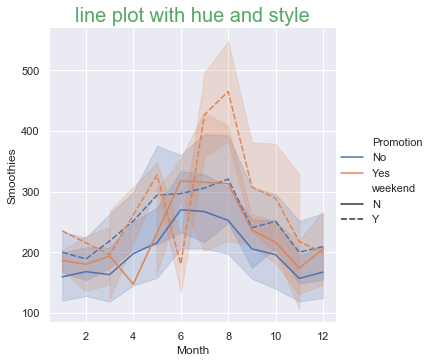

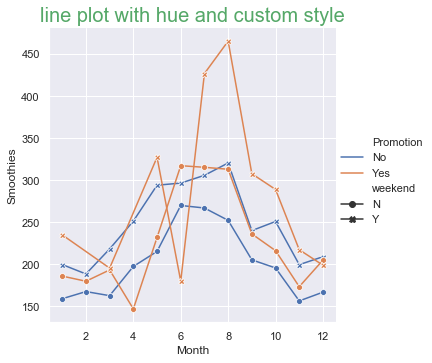

In [4]:
# When there are multiple y axis values for given x axis value, you can plot average with 
# some confidence interval

sns.relplot(x='Month', y='Smoothies', data=snacks_sales, kind='line')
plt.title('line plot', size=20, color='g')

sns.relplot(x='Month', y='Smoothies', hue='Promotion', data=snacks_sales, kind='line',
           err_style="bars", ci=68)   # Standard Errors
plt.title('line plot with Error bar and hue', size=20, color='g')

sns.relplot(x='Month', y='Smoothies', hue='Promotion', style='weekend', 
            kind='line', ci='sd', data=snacks_sales)
plt.title('line plot with hue and style', size=20, color='g')

sns.relplot(x='Month', y='Smoothies', hue='Promotion', style='weekend', dashes=False, markers=True,
            data=snacks_sales, kind='line', ci=None)
plt.title('line plot with hue and custom style', size=20, color='g')

plt.show();

In [5]:
# Create a long form DataFrame from wide form DF
long_sales = pd.melt(snacks_sales, var_name='Item', value_name='Sales',
            id_vars=['daywk', 'weekend', 'Date', 'Promotion', 'Period', 'Month', 'Quarter'])

long_sales.shape          # dimensions, number of rows and columns
long_sales.sample(n=5)    # Display random 5 sample rows, you can also use frac=0.7(70% of total rows)

(5475, 9)

daywk weekend       Date Promotion  Period  Month  Quarter  \
816    Saturday       Y  3/28/2017        No     817      3        1   
3696     Sunday       Y  2/16/2016        No     412      2        1   
37     Thursday       N   2/7/2015        No      38      2        1   
1796  Wednesday       N  12/3/2016        No     702     12        4   
1324     Sunday       Y  8/18/2015        No     230      8        3   

           Item  Sales  
816       Cakes    109  
3696  Smoothies    142  
37        Cakes     61  
1796       Pies     46  
1324       Pies     79

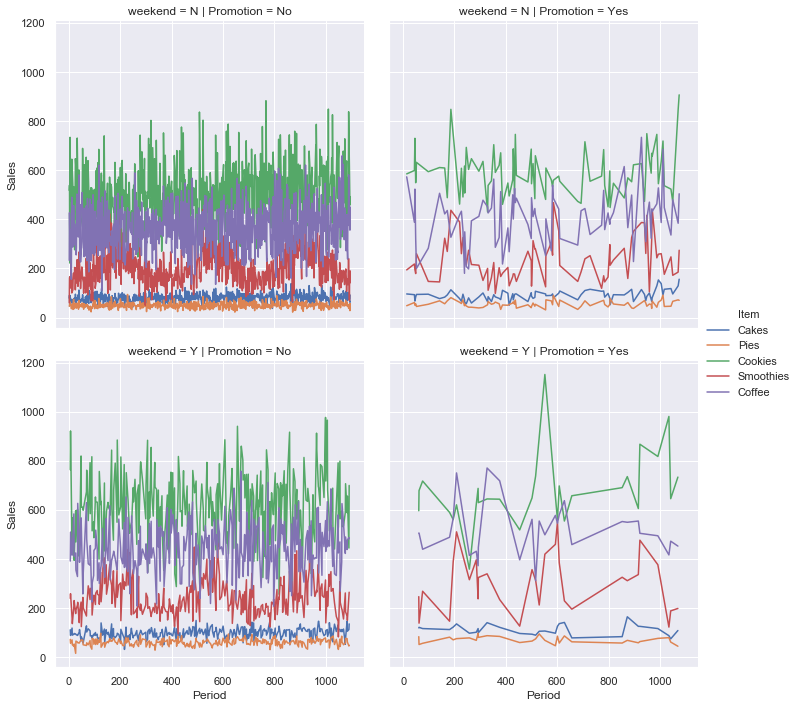

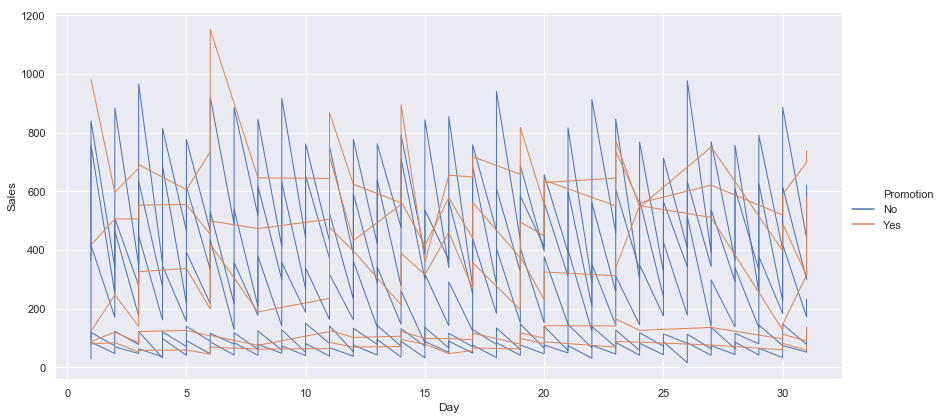

In [6]:
g = sns.relplot(x='Period', y='Sales', data=long_sales, kind='line', hue='Item', 
                row='weekend', col='Promotion')

# one line for each of Items
long_sales['Day'] = pd.DatetimeIndex(long_sales['Date']).day
sns.relplot(x='Day', y='Sales',  hue='Promotion', data=long_sales.query("weekend =='Y'"), kind='line',
            units="Item", estimator=None, lw=1, height=6, aspect=2);

### Scatterplot()

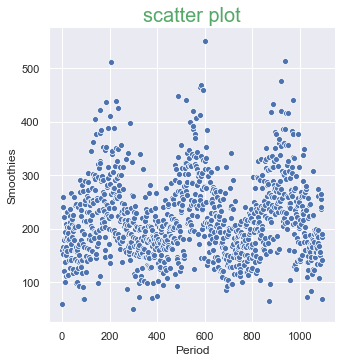

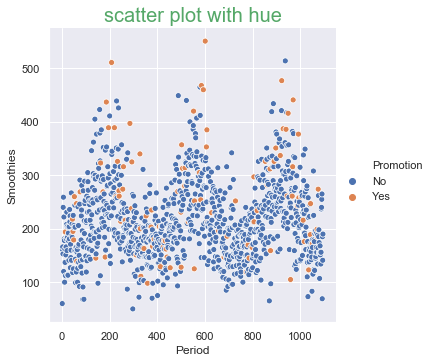

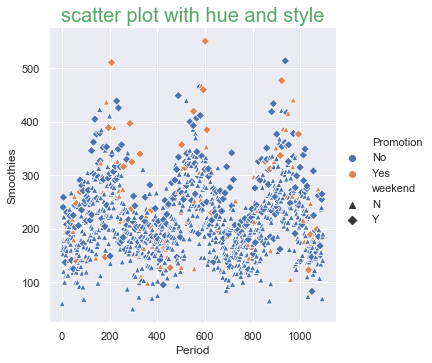

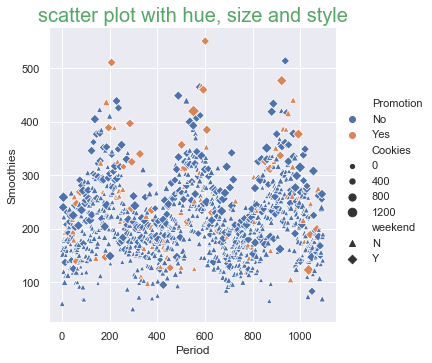

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x='Period', y='Smoothies', data=snacks_sales, kind='scatter')
plt.title('scatter plot', size=20, color='g')

sns.relplot(x='Period', y='Smoothies', hue='Promotion', data=snacks_sales)
plt.title('scatter plot with hue', size=20, color='g')

sns.relplot(x='Period', y='Smoothies', hue='Promotion', style='weekend', markers=['^', 'D'],
            data=snacks_sales)
plt.title('scatter plot with hue and style', size=20, color='g')

sns.relplot(x='Period', y='Smoothies', hue='Promotion', style='weekend', size='Cookies',
            markers=['^', 'D'],data=snacks_sales)
plt.title('scatter plot with hue, size and style', size=20, color='g');

plt.show();

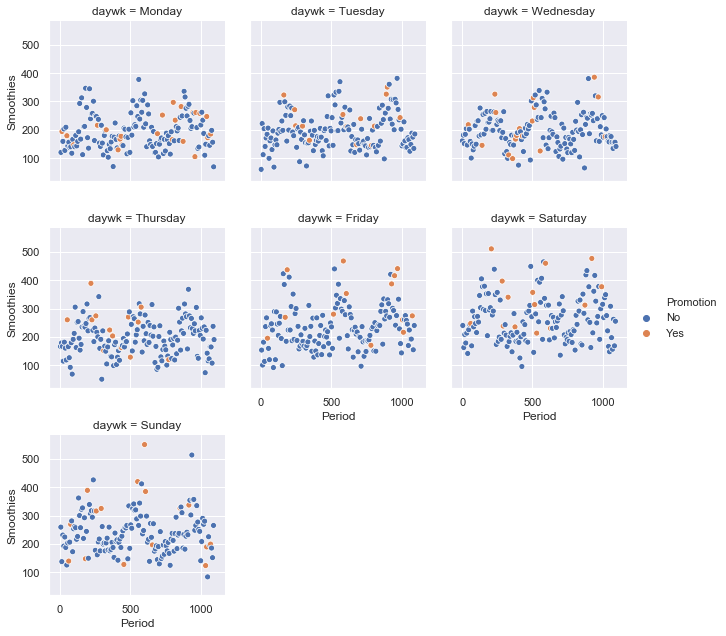

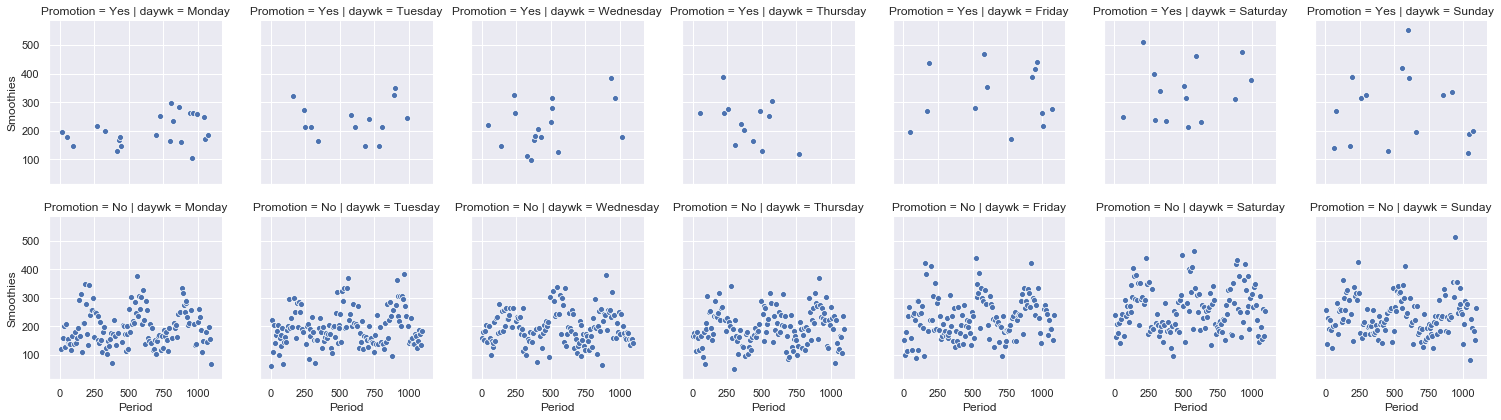

In [8]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.relplot(x='Period', y='Smoothies', hue='Promotion', col='daywk', col_wrap=3,
            col_order=day_order, data=snacks_sales, height=3)

sns.relplot(x='Period', y='Smoothies', col='daywk', col_order=day_order,
            row='Promotion', row_order=['Yes', 'No'], data=snacks_sales, height=3)

plt.show();

## Categorical Plots, sns.catplot()
- stripplot() and swarmplot()
- boxplot() and boxnplot()
- barplot() and countplot()
- violinplot()
- pointplot()

### stripplot(), kind='strip' the default option
### swarmplot(), kind='swarm'

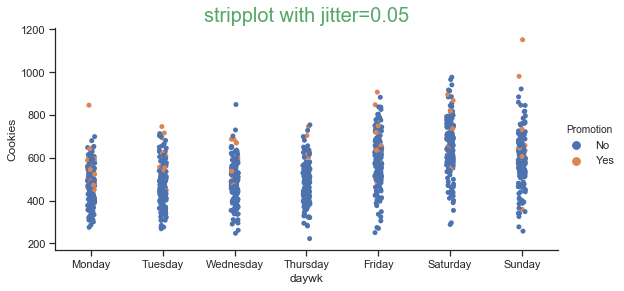

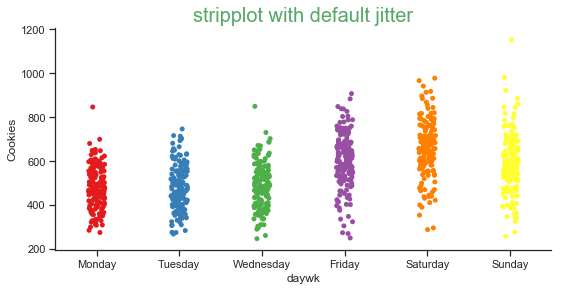

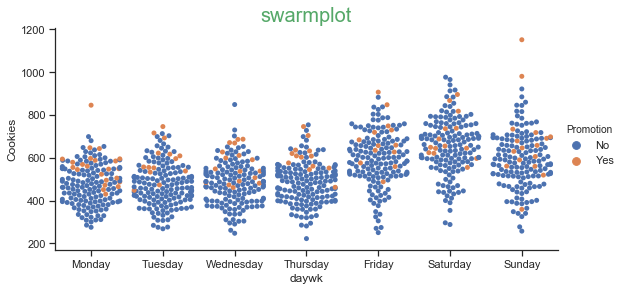

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", color_codes=True)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.catplot(x='daywk',y='Cookies', data=snacks_sales, hue='Promotion',    # both on same plot diff color
            order=day_order, jitter=0.05,height=4, aspect=2, kind='strip', dodge=False) 
# You can use dodge=True, if you want to plot two sets of plots one for each of hue values side by side
plt.title('stripplot with jitter=0.05', size=20, color='g')

sns.catplot(x='daywk',y='Cookies', data=snacks_sales.query("daywk != 'Thursday'"), 
            order=['Monday', 'Tuesday', 'Wednesday', 'Friday', 'Saturday', 'Sunday'], palette='Set1', 
            height=4, aspect=2); # jitter=False plots all the points on one line similar to plt
plt.title('stripplot with default jitter', size=20, color='g')

sns.catplot(x='daywk',y='Cookies', data=snacks_sales, order=day_order, hue='Promotion',
            kind='swarm',height=4, aspect=2)
plt.title('swarmplot', size=20, color='g');

### boxplot(), kind='box'
### boxnplot(), kind='boxn'

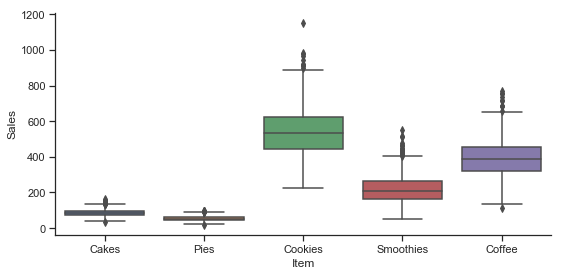

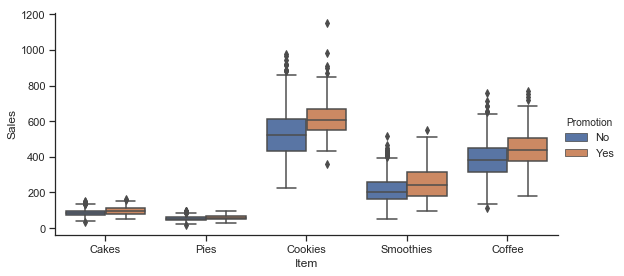

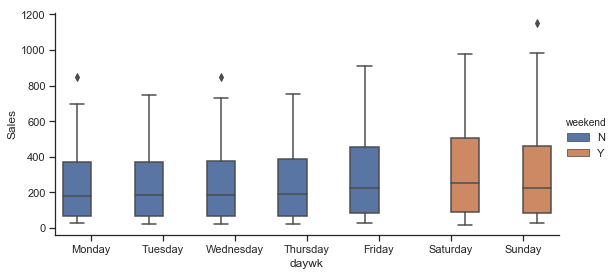

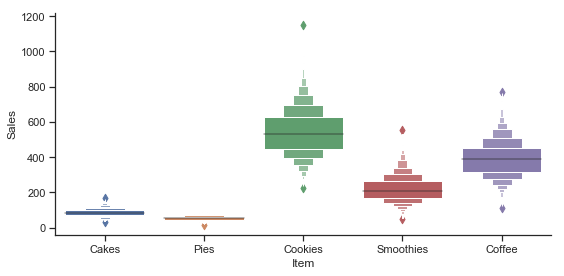

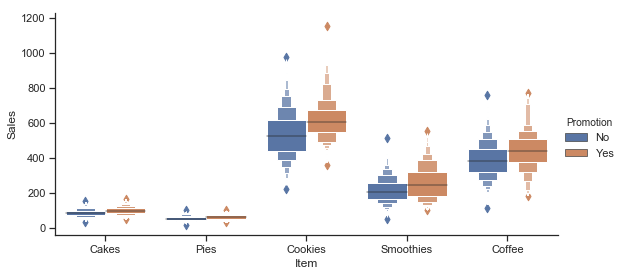

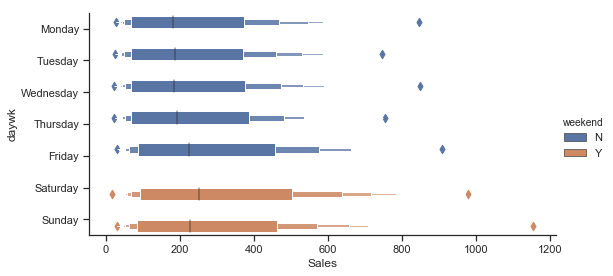

In [10]:
# for detailed explanation please refer to https://vita.had.co.nz/papers/letter-value-plot.html
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.catplot(x='Item', y='Sales', data=long_sales, kind='box', height=4, aspect=2); 
sns.catplot(x='Item', y='Sales', data=long_sales, kind='box', hue='Promotion',
            height=4, aspect=2); 
sns.catplot(x='daywk', y='Sales', data=long_sales, kind='box', hue='weekend', 
            order=day_order, height=4, aspect=2); 

sns.catplot(x='Item', y='Sales', data=long_sales, kind='boxen', height=4, aspect=2); 
sns.catplot(x='Item', y='Sales', data=long_sales, kind='boxen', hue='Promotion',
            height=4, aspect=2); 
sns.catplot(x='Sales', y='daywk', data=long_sales, kind='boxen', hue='weekend',
            order=day_order, height=4, aspect=2); 

### barplot(), kind='bar'
### countplot(), kind='count'

C:\Anaconda3\envs\keras35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


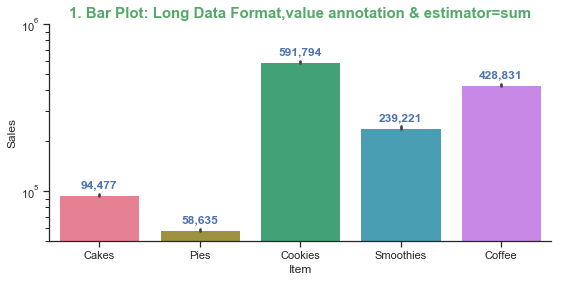

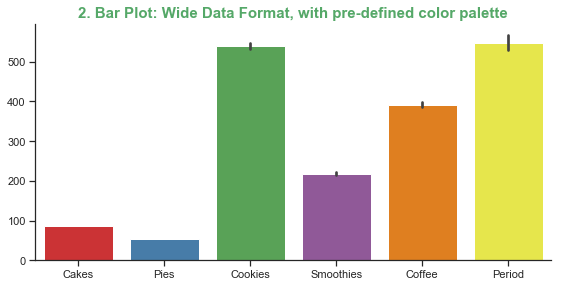

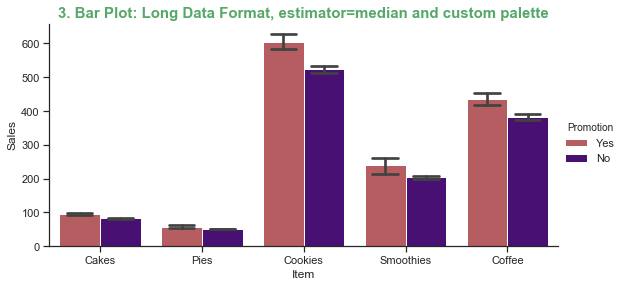

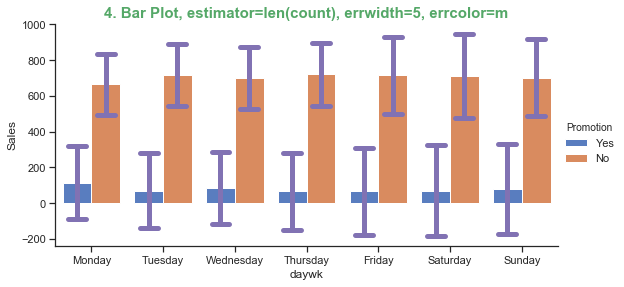

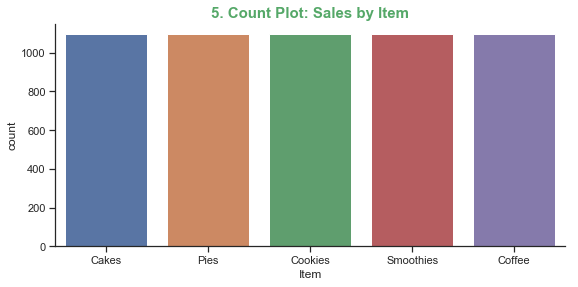

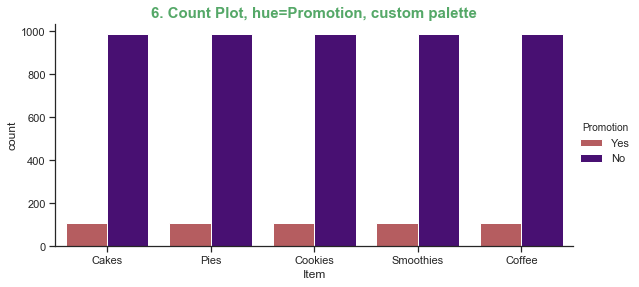

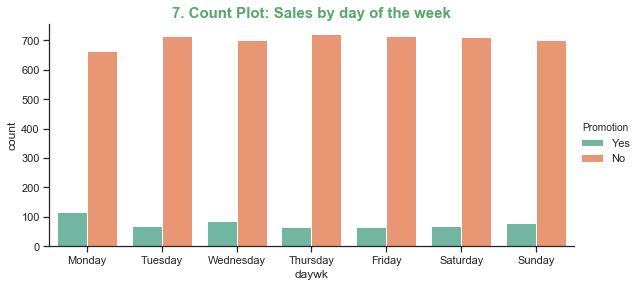

In [11]:
# possible options for estimator: numpy: median, sum, python: sum, len(for count) includes NaN
# pandas: pandas.Series.count, pandas.Series.sum ignore NaN
# in this data set mean and median are very close, and count is same for all the items so 
# these options don't reveal any thing significant 

from numpy import median

plt.figure(figsize=(9,4))
b = sns.barplot(x='Item', y='Sales', data=long_sales, estimator=sum, palette='husl')
b.set(yscale='log', ylim=[50000, 1000000])
sns.despine()
for bar in b.patches:
    b.annotate("{:,}".format(bar.get_height()),(bar.get_x()+bar.get_width()/2.,bar.get_height()),
               ha='center',va='center',xytext=(0,10),textcoords='offset points', 
               color='b', weight='bold')
plt.title('1. Bar Plot: Long Data Format,value annotation & estimator=sum', size=15, color='g', 
          weight='bold')

sns.catplot(data=snacks_sales, kind='bar', height=4, aspect=2,   # wide form
            order=['Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee', 'Period'],
            palette="Set1"); 
plt.title('2. Bar Plot: Wide Data Format, with pre-defined color palette', size=15, color='g', 
          weight='bold')

sns.catplot(x='Item', y='Sales', data=long_sales, kind='bar', hue='Promotion', 
            hue_order=['Yes','No'], palette={"Yes": "r", "No": "indigo"},
            estimator=median, capsize=0.25, height=4, aspect=2); 
plt.title('3. Bar Plot: Long Data Format, estimator=median and custom palette', size=15, color='g', 
          weight='bold')

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.catplot(x='daywk', y='Sales', data=long_sales, kind='bar', hue='Promotion', ci='sd',
            estimator=len, capsize=0.25, errcolor='m', errwidth=5,
            hue_order=['Yes','No'], palette="muted", order=day_order, height=4, aspect=2);
plt.title('4. Bar Plot, estimator=len(count), errwidth=5, errcolor=m', size=15, color='g', weight='bold')

sns.catplot(x='Item', data=long_sales, kind='count', height=4, aspect=2);  # long form data frame
plt.title('5. Count Plot: Sales by Item', size=15, color='g', weight='bold')

sns.catplot(x='Item', data=long_sales, kind='count', hue='Promotion', 
            hue_order=['Yes','No'], palette={"Yes": "r", "No": "indigo"}, height=4, aspect=2); 
plt.title('6. Count Plot, hue=Promotion, custom palette', size=15, color='g', weight='bold')

sns.catplot(x='daywk', data=long_sales, kind='count', hue='Promotion', 
            hue_order=['Yes','No'], palette="Set2", order=day_order, height=4, aspect=2);
plt.title('7. Count Plot: Sales by day of the week', size=15, color='g', weight='bold');

### violinplot(), kind='violin'

C:\Anaconda3\envs\keras35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda3\envs\keras35\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


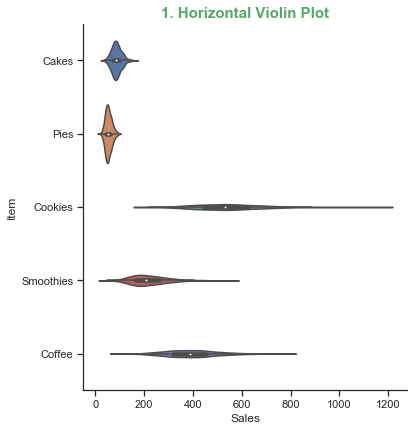

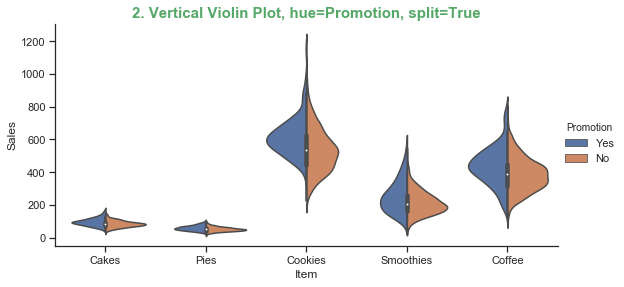

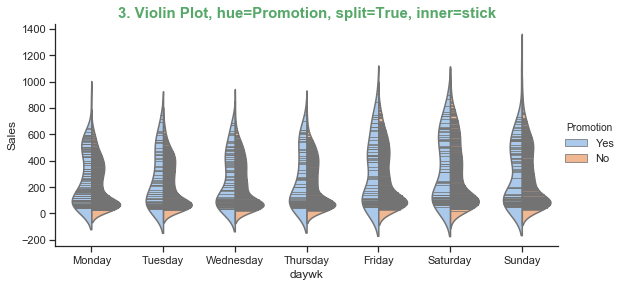

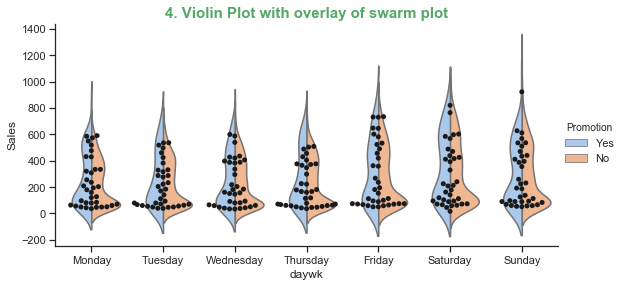

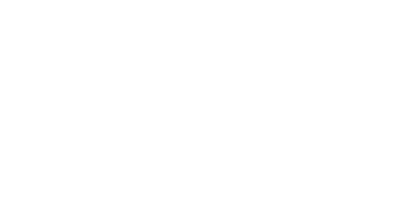

In [12]:
sns.catplot(x='Sales', y='Item', data=long_sales, kind='violin', height=6, aspect=1)
plt.title('1. Horizontal Violin Plot', size=15, color='g', weight='bold')

sns.catplot(x='Item', y='Sales', data=long_sales, kind='violin', hue='Promotion', 
            hue_order=["Yes", "No"], split=True, height=4, aspect=2) 
plt.title('2. Vertical Violin Plot, hue=Promotion, split=True', size=15, color='g', weight='bold')

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.catplot(x='daywk', y='Sales', data=long_sales, kind='violin', order=day_order, hue='Promotion', 
            hue_order=["Yes", "No"], split=True, inner="stick", palette="pastel",height=4, aspect=2)
plt.title('3. Violin Plot, hue=Promotion, split=True, inner=stick', size=15, color='g', weight='bold')

g = sns.catplot(x='daywk', y='Sales', data=long_sales, kind='violin', order=day_order, hue='Promotion',
                hue_order=["Yes", "No"], split=True, inner=None, palette="pastel",  height=4, aspect=2)
sns.catplot(x='daywk',y='Sales', data=long_sales[long_sales['Period'] < 50], order=day_order, color="k", size=3,
            kind='swarm',height=4, aspect=2, ax=g.ax)
g.ax.set_title('4. Violin Plot with overlay of swarm plot', size=15, color='g', weight='bold');

plt.axis('off');

### pointplot(), kind='point'

C:\Anaconda3\envs\keras35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


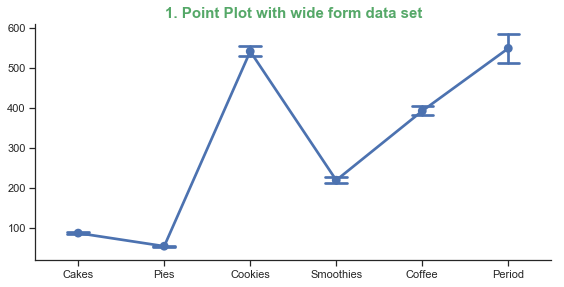

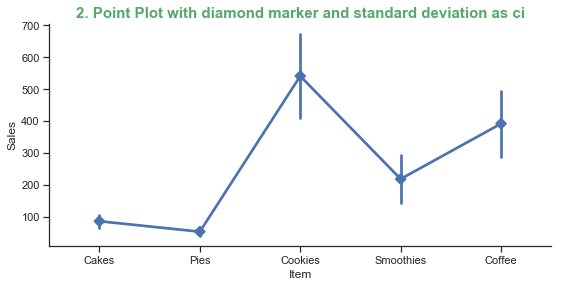

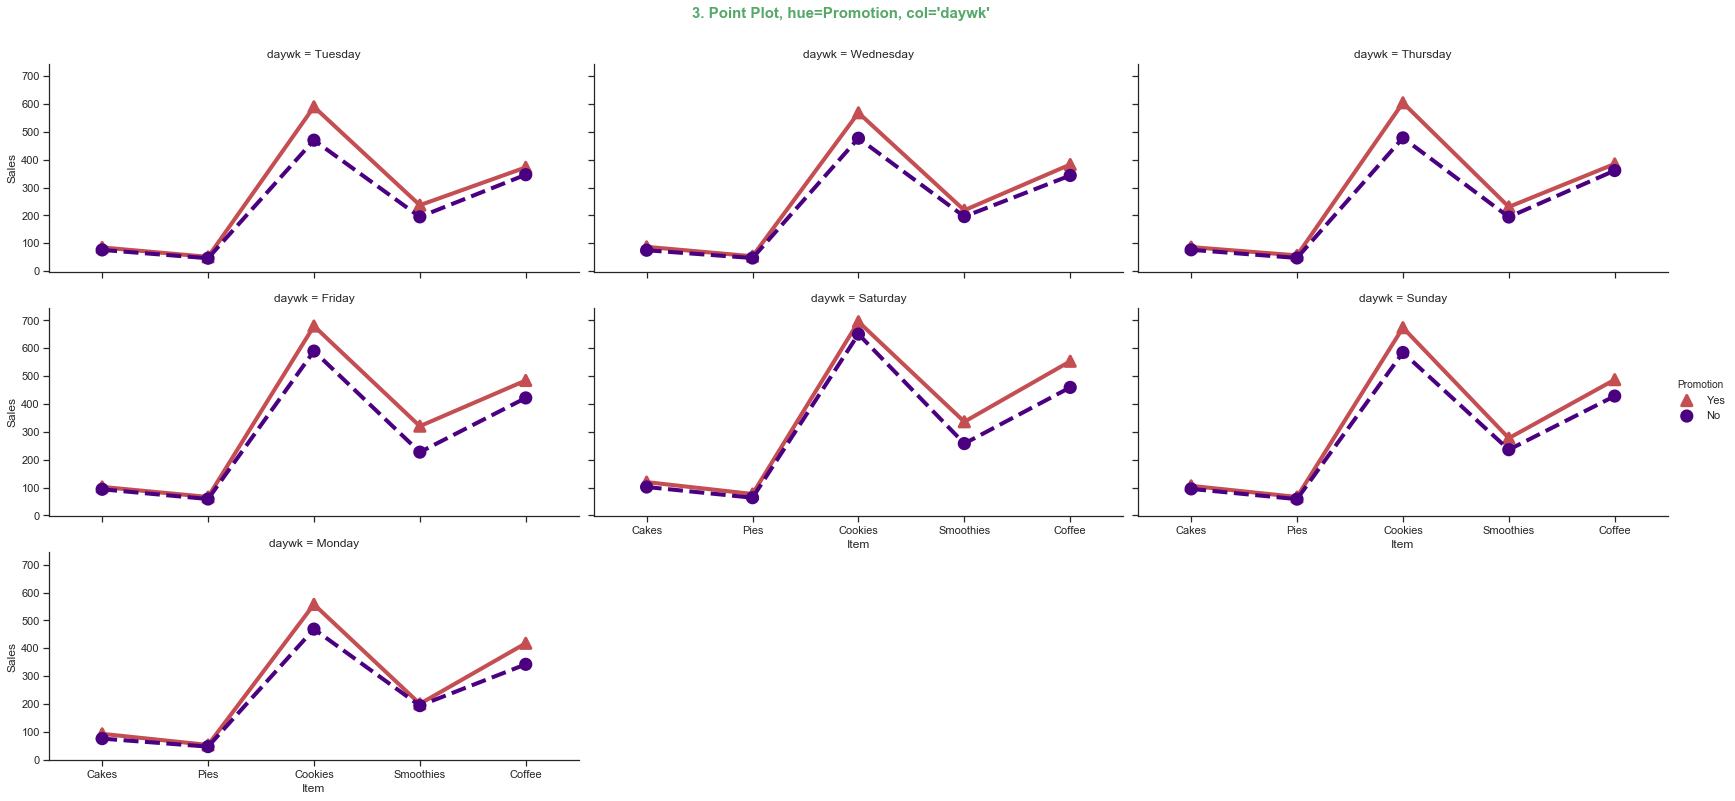

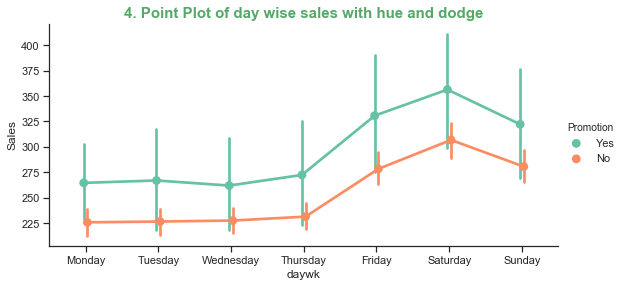

In [13]:
sns.catplot(data=snacks_sales, kind='point', ci=99.99, capsize=0.25, height=4,        # wide form df
            aspect=2, order=['Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee', 'Period'])
plt.title('1. Point Plot with wide form data set', size=15, color='g', weight='bold');

sns.catplot(x='Item', y='Sales', data=long_sales, kind='point', markers='D', ci='sd',
            height=4, aspect=2)  # long form data frame
plt.title('2. Point Plot with diamond marker and standard deviation as ci', size=15, color='g', weight='bold');

sns.catplot(x='Item', y='Sales', data=long_sales, kind='point', hue='Promotion', 
            hue_order=['Yes','No'], palette={"Yes": "r", "No": "indigo"},
            markers=["^", "o"], linestyles=["-", "--"], ci=None, col='daywk', col_wrap=3,
            height=4, aspect=2, scale=1.5)
plt.suptitle("3. Point Plot, hue=Promotion, col='daywk'", size=15, color='g', weight='bold')
plt.tight_layout(pad=5,w_pad=0.25, h_pad=0.25);

sns.catplot(x='daywk', y='Sales', data=long_sales, kind='point', hue='Promotion', dodge=True,
            hue_order=['Yes','No'], palette="Set2", order=day_order, height=4, aspect=2)
plt.title('4. Point Plot of day wise sales with hue and dodge', size=15, color='g', weight='bold');

### Distribution Plots
- distplot()
- rugplot()
- kdeplot()

C:\Anaconda3\envs\keras35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


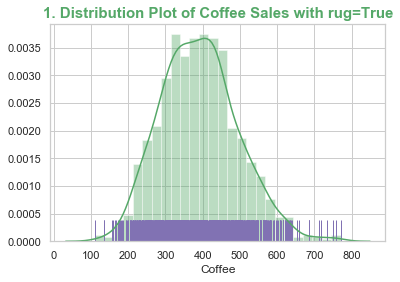

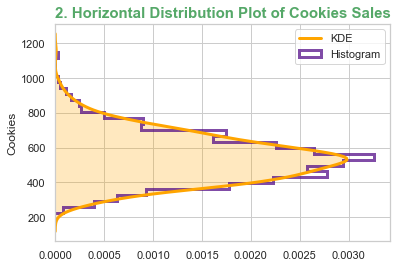

C:\Anaconda3\envs\keras35\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


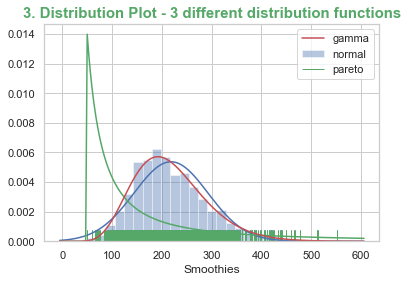

In [14]:
sns.set(style='whitegrid', color_codes=True)

sns.distplot(snacks_sales.Coffee, color='g', rug=True, rug_kws={"color": 'm', "height": 0.1})
plt.title('1. Distribution Plot of Coffee Sales with rug=True', size=15, color='g', weight='bold')
plt.show();

sns.distplot(snacks_sales.Cookies,  vertical=True,                #hist=False
             hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.7, "color": "indigo", 
                       "label": "Histogram"},
             kde_kws={"shade": True, "color": "orange", "lw": 3, "label": "KDE"})           
plt.title('2. Horizontal Distribution Plot of Cookies Sales', size=15, color='g', weight='bold')             
plt.show();

from scipy.stats import norm, pareto, gamma
ax = sns.distplot(snacks_sales.Smoothies, fit=norm, kde=False, rug=True, color='b', 
                  fit_kws={"color": "b"}, label='normal')
sns.distplot(snacks_sales.Smoothies, hist=False, fit=pareto, kde=False, rug=True, color='g', label='pareto', 
             fit_kws={"color": "g"}, ax=ax)
sns.distplot(snacks_sales.Smoothies, hist=False, fit=gamma, kde=False, color='r', label='gamma', 
             fit_kws={"color": "r"}, ax=ax)
ax.legend()
plt.title('3. Distribution Plot - 3 different distribution functions', size=15, color='g', weight='bold');
plt.show();

C:\Anaconda3\envs\keras35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


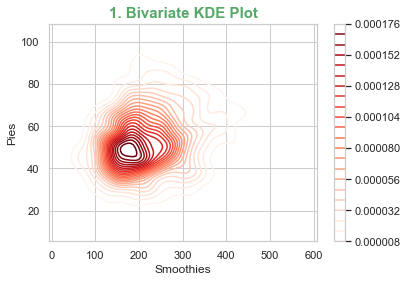

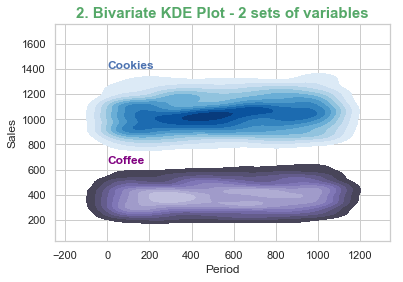

In [15]:
sns.kdeplot(snacks_sales.Smoothies, snacks_sales.Pies, kernel='epa', n_levels=25,
            cmap='Reds', cbar=True)
plt.title('1. Bivariate KDE Plot', size=15, color='g', weight='bold');
plt.show();

Cookies_temp = snacks_sales.Cookies + 500
ax=sns.kdeplot(snacks_sales.Period, snacks_sales.Coffee, kernel='gau',shade=True, shade_lowest=False, 
            cmap='Purples_d')
sns.kdeplot(snacks_sales.Period, Cookies_temp, kernel='cos', shade=True, shade_lowest=False,
            cmap='Blues')
ax.set_ylabel('Sales')
ax.text(0, 1400, 'Cookies', color='b', weight='bold')
ax.text(0, 650, 'Coffee', color='purple', weight='bold')
plt.title('2. Bivariate KDE Plot - 2 sets of variables', size=15, color='g', weight='bold')
plt.show();

## Regression Plots
- regplot()
- lmplot()
- residplot()

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read the data from a csv file into pandas data frame
wine_quality = pd.read_csv('winequality.csv', delimiter=';')

quality_map = {3:'Low', 4: 'Low', 5:'Med', 6:'Med', 7:'High', 8:'High'}
wine_quality['Quality'] = wine_quality['quality'].map(quality_map)

corr = wine_quality.corr()

wine_quality.head()
set(wine_quality.quality)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality Quality  
0      9.4        5     Med  
1      9.8        5     Med  
2      9.8        5     Med  
3      9.8        6     Med  
4      9.4        5     Med

{3, 4, 5, 6, 7, 8}

C:\Anaconda3\envs\keras35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


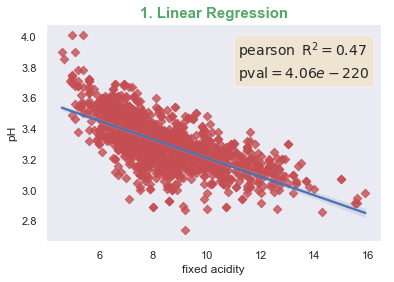

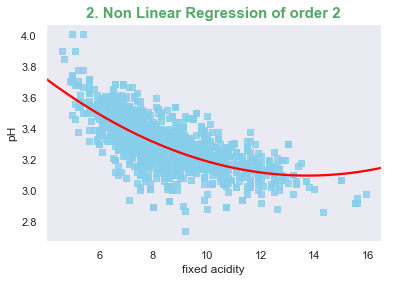

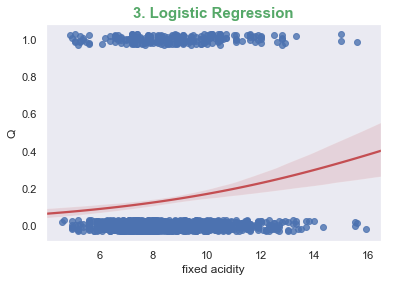

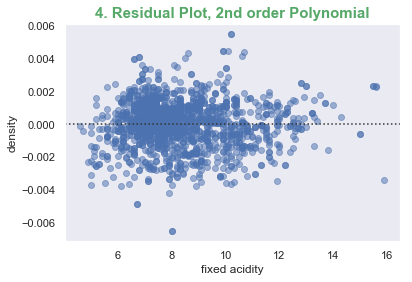

In [17]:
sns.set(style='dark', color_codes=True)

from scipy.stats import pearsonr
r, p = pearsonr(wine_quality['fixed acidity'], wine_quality.pH)
g1 = sns.regplot(x='fixed acidity', y='pH', data=wine_quality, truncate=True, ci=99,
                 marker='D', scatter_kws={'color': 'r'});
textstr = '$\mathrm{pearson}\hspace{0.5}\mathrm{R}^2=%.2f$\n$\mathrm{pval}=%.2e$' % (r**2, p)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
g1.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=14, va='top', bbox=props)
plt.title('1. Linear Regression', size=15, color='g', weight='bold')
plt.show();

g2 = sns.regplot(x='fixed acidity', y='pH', data=wine_quality, order=2, ci=None, 
                 marker='s', scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'});
plt.title('2. Non Linear Regression of order 2', size=15, color='g', weight='bold')
plt.show()

wine_quality['Q'] = wine_quality['Quality'].map({'Low': 0, 'Med': 0, 'High':1})
g3 = sns.regplot(x='fixed acidity', y='Q', data=wine_quality, logistic=True, n_boot=750, y_jitter=.03, 
                line_kws={'color': 'r'})
plt.title('3. Logistic Regression', size=15, color='g', weight='bold')
plt.show();

g4 = sns.residplot(x='fixed acidity', y='density', order=2, data=wine_quality, 
                   scatter_kws={'color': 'b', 'alpha': 0.5});
plt.title('4. Residual Plot, 2nd order Polynomial', size=15, color='g', weight='bold')
plt.show();

C:\Anaconda3\envs\keras35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


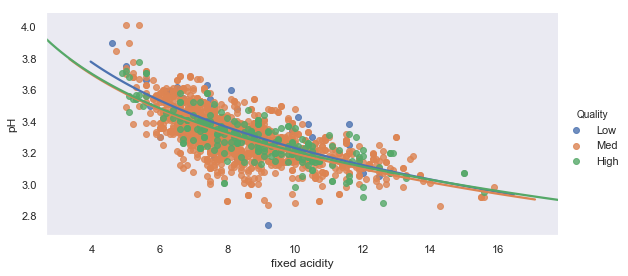

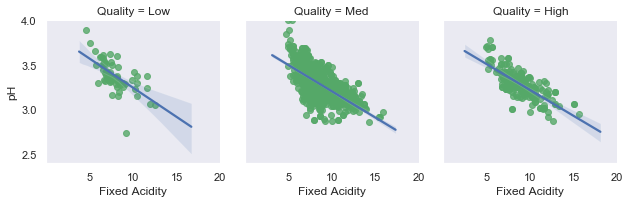

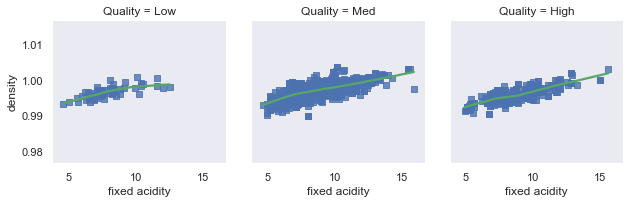

In [18]:
g1 = sns.lmplot(x='fixed acidity', y='pH', hue='Quality', hue_order=['Low', 'Med', 'High'], logx=True,
               data=wine_quality, height=4, aspect=2, ci=None)

g2 = sns.lmplot(x='fixed acidity', y='pH', data=wine_quality, ci=99, col='Quality', 
                col_order=['Low', 'Med', 'High'], height=3, robust=True,  scatter_kws={'color': 'g'})
g2 = g2.set_axis_labels("Fixed Acidity", "pH")
g2.set(xlim=(0, 20), ylim=(2.4, 4.0), xticks=[5, 10, 15, 20], yticks=[2.5, 3.0, 3.5, 4.0])

g3 = sns.lmplot(x='fixed acidity', y='density', col='Quality', col_order=['Low', 'Med', 'High'],
                data=wine_quality, lowess=True, markers='s', height=3, line_kws={'color': 'g'})
plt.show();

## Multi Plot Grids
### jointplot() and JointGrid()

C:\Anaconda3\envs\keras35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


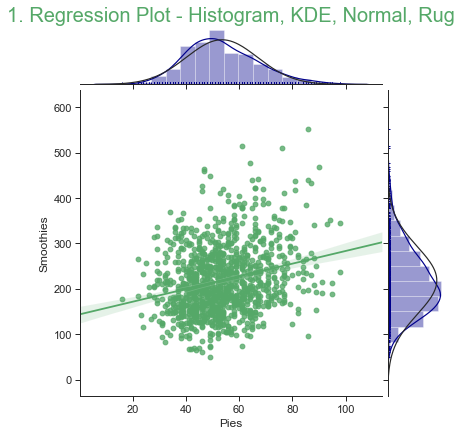

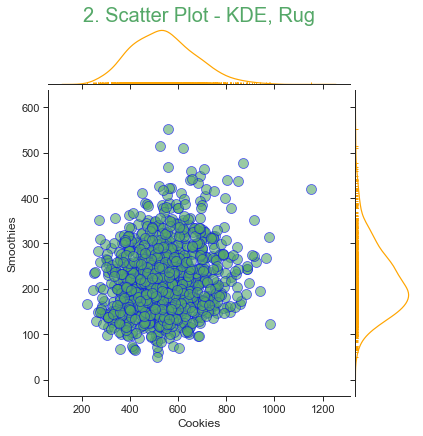

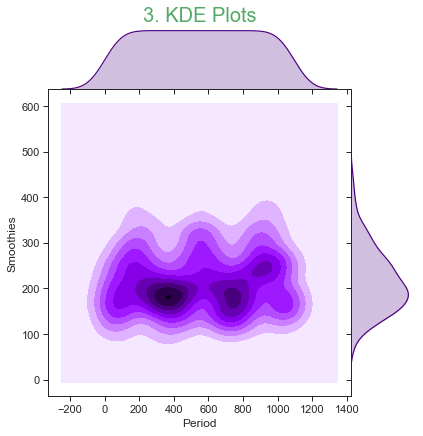

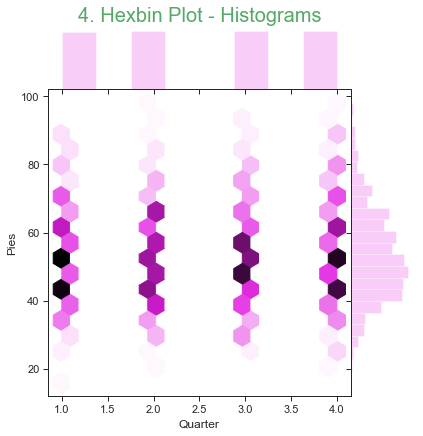

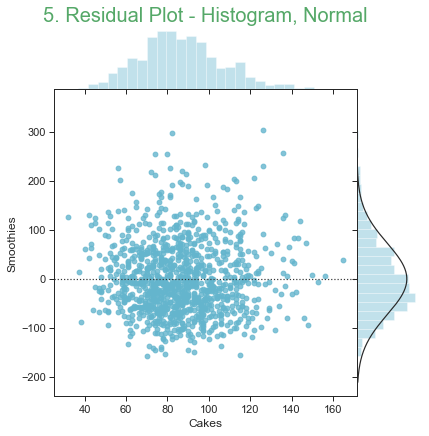

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from itertools import chain

sns.set(rc={"axes.linewidth": 1, "xtick.major.width": 1, "ytick.major.width": 1, 
            "xtick.major.size": 5, "ytick.major.size": 5}, style="ticks", context="paper", 
             font_scale=1.25)

g1 = sns.jointplot(x='Pies', y='Smoothies', data=snacks_sales, kind='reg', 
                  marginal_kws=dict(bins=15, fit=norm, rug=True, color='darkblue'), 
                  space=0.1, color='g')
g1.ax_marg_x.set_title('1. Regression Plot - Histogram, KDE, Normal, Rug', size=20, color='g')

g2 = sns.jointplot(x='Cookies', y='Smoothies', data=snacks_sales, s=100, 
              marginal_kws=dict(kde=True, rug=True, hist=False, color='orange'), space=0.1, color='g',
              edgecolor="blue", alpha=0.6)
g2.ax_marg_x.set_title('2. Scatter Plot - KDE, Rug', size=20, color='g')

g3 = sns.jointplot(x='Period', y='Smoothies', data=snacks_sales, kind='kde', space=0, color='indigo')
g3.ax_marg_x.set_title('3. KDE Plots', size=20, color='g');

g4 = sns.jointplot(x='Quarter', y='Pies', data=snacks_sales, kind='hex', space=0, color='violet');
g4.ax_marg_x.set_title('4. Hexbin Plot - Histograms', size=20, color='g');

g5 = sns.jointplot(x='Cakes', y='Smoothies', data=snacks_sales, kind='resid', space=0, color='c')
g5.ax_marg_x.set_title('5. Residual Plot - Histogram, Normal', size=20, color='g');

C:\Anaconda3\envs\keras35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


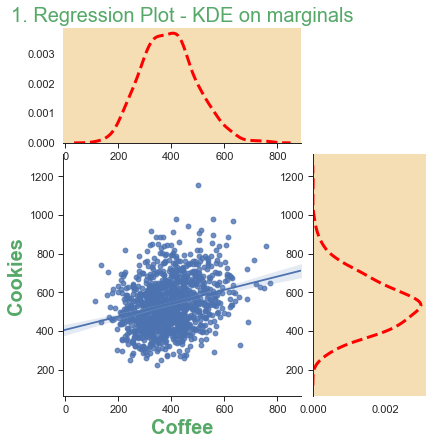

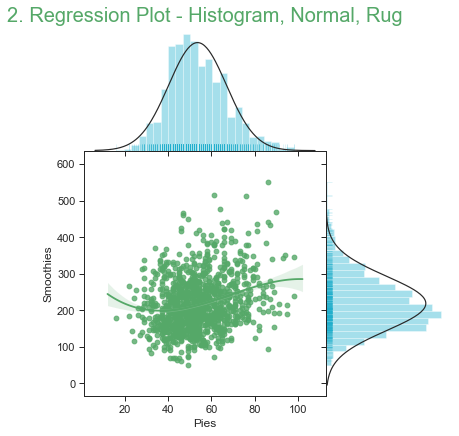

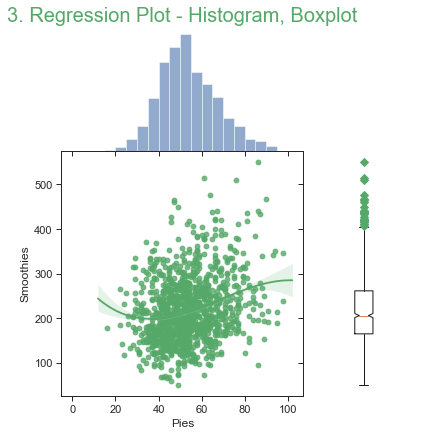

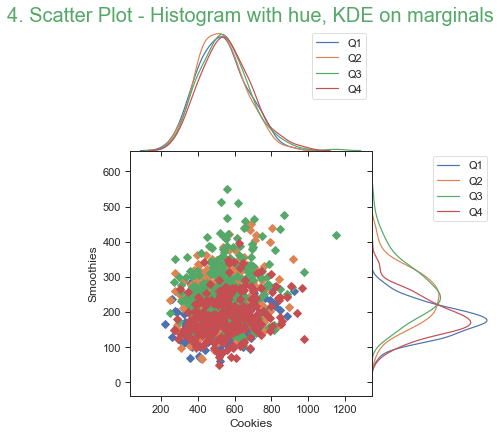

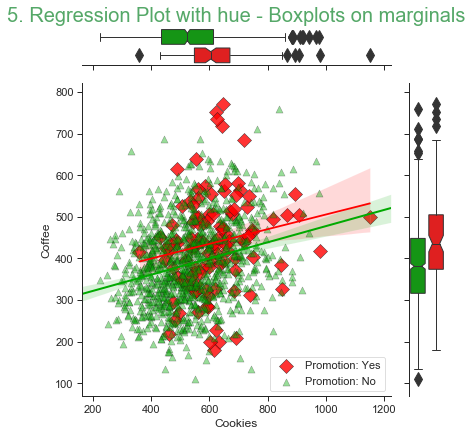

In [20]:
# 1. Simple Grid with default parameters, and axes level customisation
g1 = sns.JointGrid(x='Coffee', y='Cookies', data=snacks_sales, space=0.1, height=6, ratio=2)
g1 = g1.plot(sns.regplot, sns.kdeplot)
#g = g.plot(plt.scatter, sns.distplot);

g1.ax_joint.set_xlabel('Coffee', color='g', size=20, weight='bold')
g1.ax_joint.set_ylabel('Cookies', color='g', size=20, weight='bold')

plt.setp(g1.ax_marg_x.get_yticklabels(), visible=True)
plt.setp(g1.ax_marg_x.get_xticklabels(), visible=True)
plt.setp(g1.ax_marg_y.get_xticklabels(), visible=True)
plt.setp(g1.ax_marg_y.get_yticklabels(), visible=True)

g1.ax_marg_x.set_facecolor('wheat')
g1.ax_marg_y.set_facecolor('wheat')

for l in chain(g1.ax_marg_x.axes.lines, g1.ax_marg_y.axes.lines):
    l.set_linestyle('--')
    l.set_lw(3)
    l.set_color('red')
g1.ax_marg_x.set_title('1. Regression Plot - KDE on marginals', size=20, color='g')

# 2. Separating Joint and Marginal Plots with respective parameters 
g2 = sns.JointGrid(x='Pies', y='Smoothies', data=snacks_sales, space=0, ratio=2)
g2 = g2.plot_joint(sns.regplot, color="g", order=3, ci=68 )
g2 = g2.plot_marginals(sns.distplot, kde=False, rug=True, fit=norm, color="#1EAFCD23")
g2.ax_marg_x.set_title('2. Regression Plot - Histogram, Normal, Rug', size=20, color='g')

# 3. Separate Joint, marginal X and marginal Y plots with independent controls on each
g3 = sns.JointGrid(x='Pies', y='Smoothies', data=snacks_sales, space=0, ratio=2)
g3 = g3.plot_joint(sns.regplot, color="g", order=3, ci=68)
g3.ax_marg_x.hist(snacks_sales['Pies'], color="b", alpha=.6, bins=np.arange(0, 100, 5))
g3.ax_marg_y.boxplot(snacks_sales['Smoothies'], 1, 'gD')
g3.ax_marg_x.set_title('3. Regression Plot - Histogram, Boxplot', size=20, color='g');

# 4. Implementing hue on JointGrid
g4 = sns.JointGrid("Cookies", "Smoothies", snacks_sales, space=0, ratio=2)
i=1
for quarter, sales in snacks_sales.groupby('Quarter'):
    sns.kdeplot(sales["Cookies"], ax=g4.ax_marg_x, label='Q'+str(i));
    sns.kdeplot(sales["Smoothies"], ax=g4.ax_marg_y, vertical=True, label='Q'+str(i));
    g4.ax_joint.plot(sales["Cookies"], sales["Smoothies"], "D", ms=5)
    i +=1
g4.ax_marg_x.set_title('4. Scatter Plot - Histogram with hue, KDE on marginals', size=20, color='g')

# 5. User Defined joint and marginal plots

g5 = sns.JointGrid("Cookies", "Coffee", snacks_sales, space=0.5, ratio=6)

def marginal_boxplot(a, vertical=False, **kws):
    g = sns.boxplot(x="Promotion", y="Coffee", orient="v", **kws) if vertical \
                 else sns.boxplot(x="Cookies", y="Promotion", orient="h", **kws)
    g.set_ylabel("")
    g.set_xlabel("")

g5.plot_marginals(marginal_boxplot, palette={"Yes": "#ff000088", "No": "#00aa007e" }, data=snacks_sales, 
                 linewidth=1, fliersize=10,notch=True)

sns.regplot(x="Cookies", y="Coffee", data=snacks_sales.query("Promotion == 'Yes'"), color="#ff000088", 
            truncate=True, label='Promotion: Yes', marker='D', ax=g5.ax_joint,
            scatter_kws={"s": 100, "edgecolor": "k", "linewidth": .5, "alpha": .8}) 
sns.regplot(x="Cookies", y="Coffee", data=snacks_sales.query("Promotion == 'No'"), 
            color="#00aa007e", marker='^', label='Promotion: No',
            scatter_kws={"s": 50, "edgecolor": "k", "linewidth": .5, "alpha": .4}, 
            line_kws={"linewidth": 2}, ax=g5.ax_joint)

g5.ax_marg_x.set_title('5. Regression Plot with hue - Boxplots on marginals', size=20, color='g')
g5.ax_joint.legend(loc=4)

plt.show();

### pairplot() and PairGrid()

C:\Anaconda3\envs\keras35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


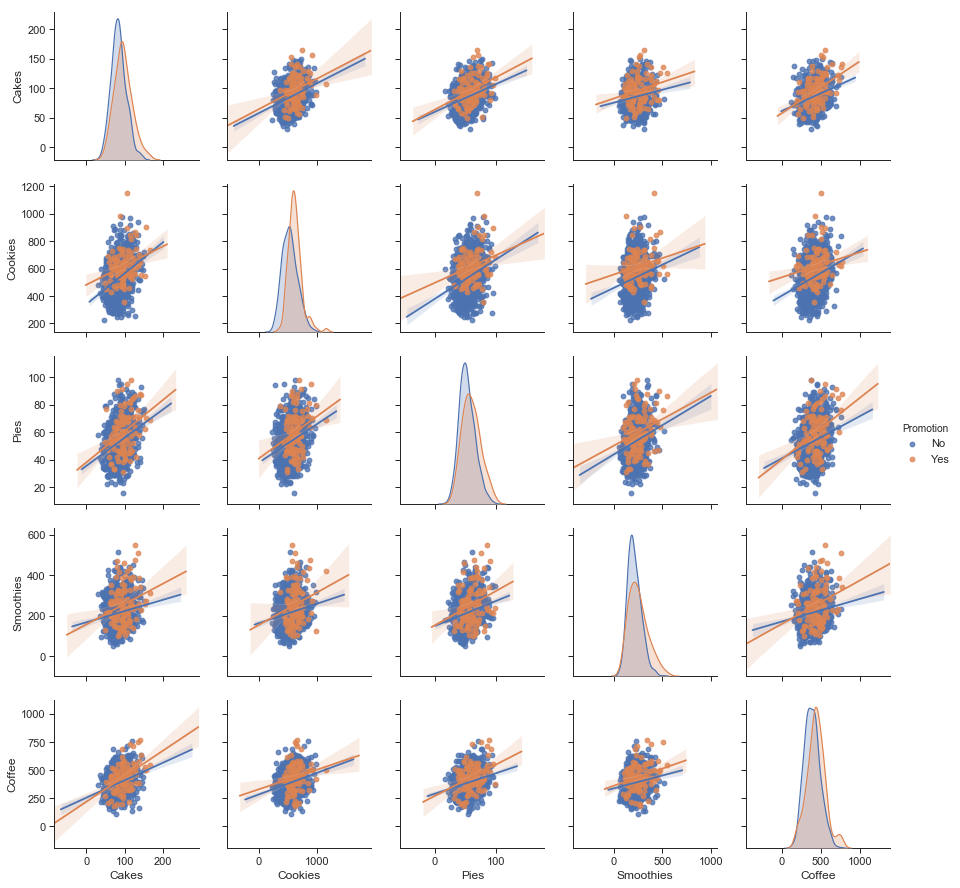

In [21]:
snacks_sales_items = snacks_sales.loc[:,['Cakes', 'Cookies', 'Pies', 'Smoothies','Coffee','Promotion']]
sns.pairplot(snacks_sales_items, hue='Promotion', kind='reg')
plt.show();

C:\Anaconda3\envs\keras35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


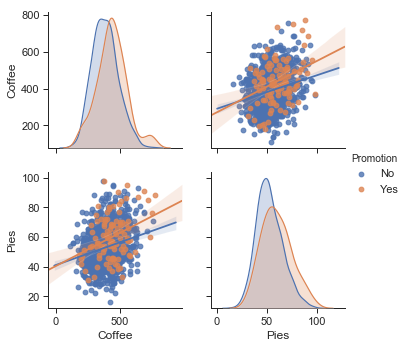

In [22]:
sns.pairplot(snacks_sales_items, vars=['Coffee', 'Pies'],hue='Promotion', kind='reg')
plt.show();

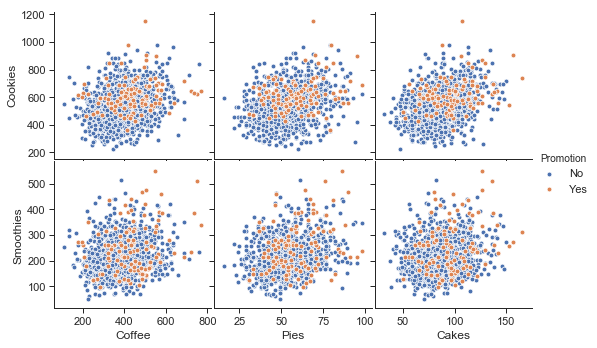

In [23]:
g = sns.pairplot(snacks_sales_items, x_vars=['Coffee', 'Pies', 'Cakes'], y_vars=['Cookies', 'Smoothies'],
             hue='Promotion', kind='scatter')
g.fig.subplots_adjust(wspace=.02, hspace=.02);
plt.show();

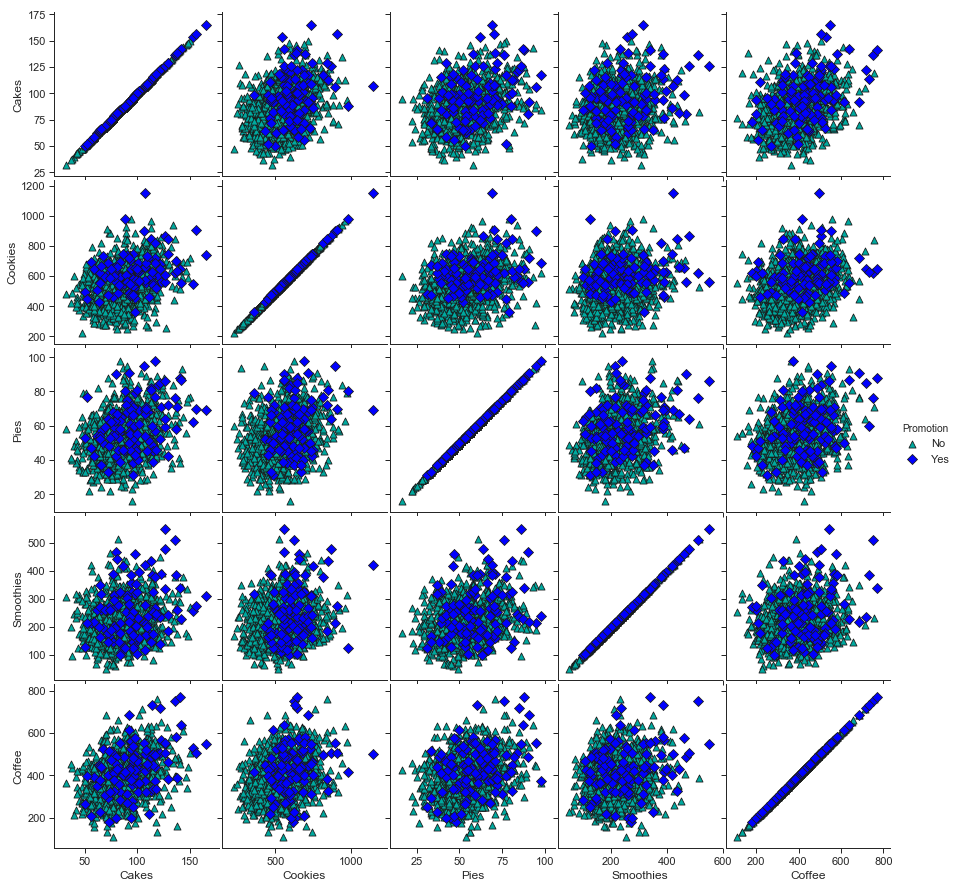

In [24]:
g = sns.PairGrid(snacks_sales_items, hue='Promotion', hue_kws={"marker": ["^", "D"]}, 
                 palette={'Yes': 'blue', 'No': '#00a99f05'})
g.map(plt.scatter, edgecolor='k', s=50)
g.add_legend()
g.fig.subplots_adjust(wspace=.02, hspace=.02);

C:\Anaconda3\envs\keras35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


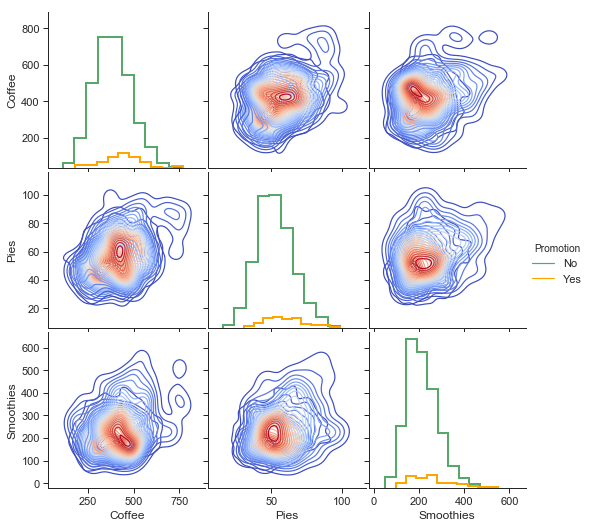

In [25]:
g = sns.PairGrid(snacks_sales_items, vars=['Coffee', 'Pies', 'Smoothies'],
                 hue='Promotion', palette={'Yes': 'Orange', 'No': 'g'})
g.map_diag(plt.hist, histtype="step", linewidth=2)
g.map_offdiag(sns.kdeplot, n_levels=25, cmap="coolwarm")
g.add_legend()
g.fig.subplots_adjust(wspace=.02, hspace=.02);

C:\Anaconda3\envs\keras35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


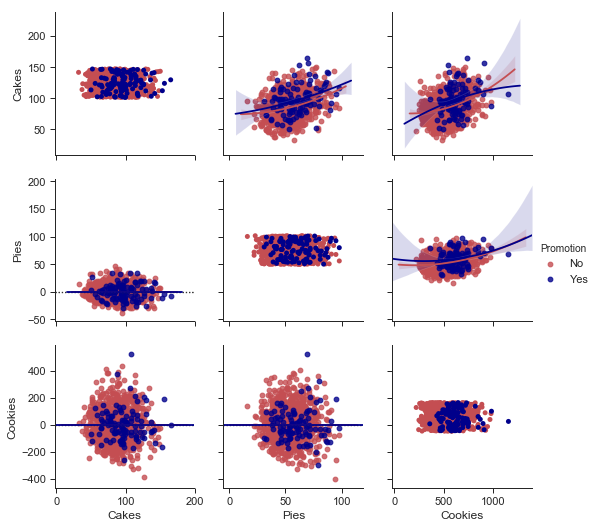

In [26]:
g = sns.PairGrid(snacks_sales_items, vars=['Cakes', 'Pies', 'Cookies'], hue='Promotion', 
                 palette={'Yes': 'darkblue', 'No': 'r'})
g.map_diag(sns.stripplot, jitter=True)
g.map_upper(sns.regplot, order=2, ci=90)
g.map_lower(sns.residplot, order=2, lowess=True)
g.add_legend();

### FacetGrid

C:\Anaconda3\envs\keras35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


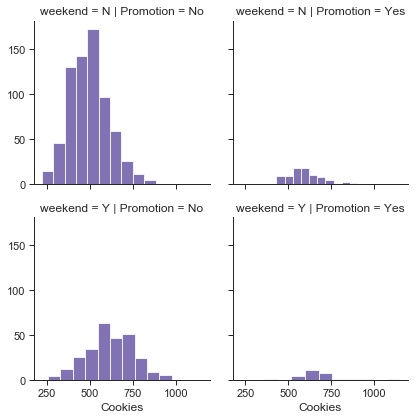

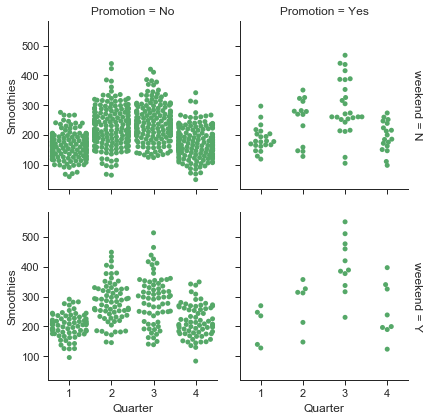

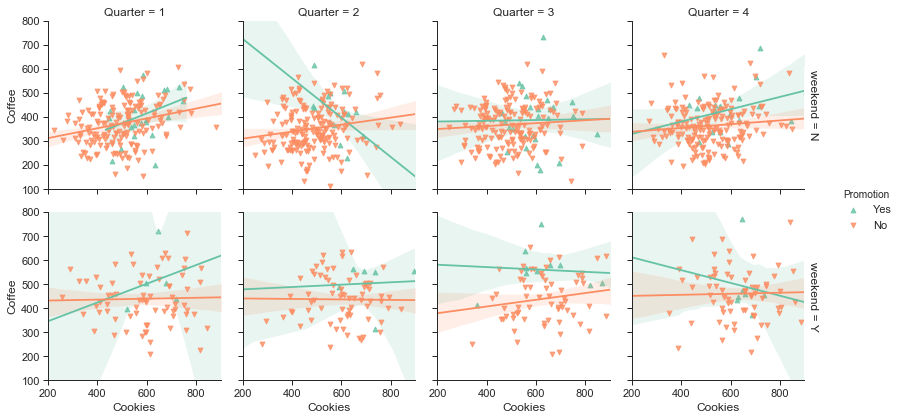

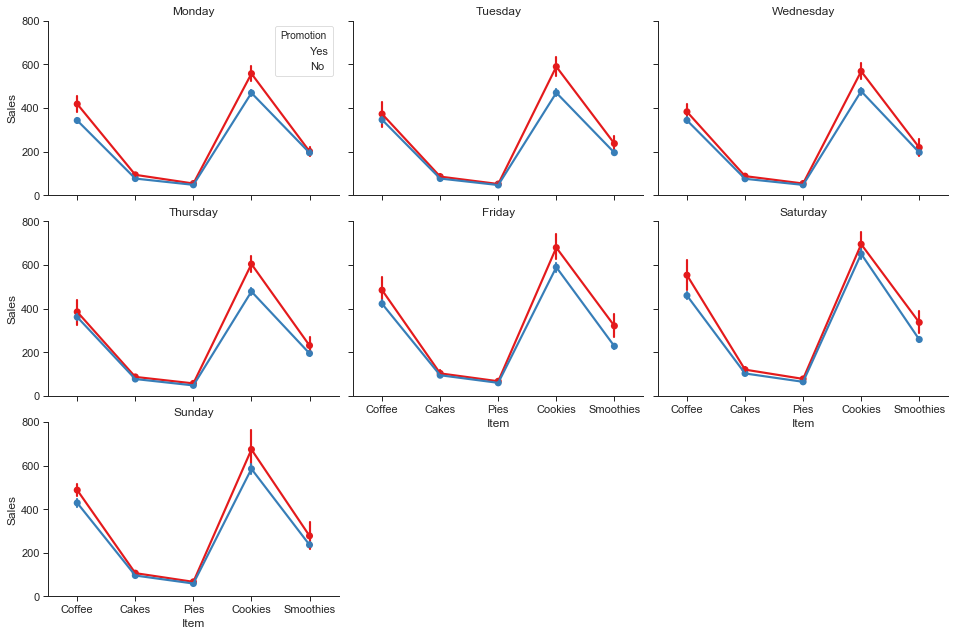

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.FacetGrid(snacks_sales, col="Promotion",  row="weekend", height=3)
g = g.map(plt.hist, "Cookies", bins=10, color='m')

g = sns.FacetGrid(snacks_sales, col="Promotion",  row="weekend", height=3, margin_titles=True)
g = g.map(sns.swarmplot, "Quarter","Smoothies", order=[1, 2, 3, 4], color='g')

g = sns.FacetGrid(snacks_sales, col="Quarter",  row="weekend", hue="Promotion",hue_order=['Yes', 'No'],
                  height=3, margin_titles=True, palette="Set2", hue_kws=dict(marker=["^", "v"]))
g = g.map(sns.regplot, "Cookies","Coffee")
g.set(xlim=(200, 900), ylim=(100,800))
g.add_legend();

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
item_order = ['Coffee', 'Cakes', 'Pies', 'Cookies', 'Smoothies']
g = sns.FacetGrid(long_sales, col="daywk",col_wrap=3, col_order=day_order, hue="Promotion", 
                  hue_order=['Yes', 'No'], palette="Set1", height=3, legend_out=False,
                  aspect=1.5, margin_titles=True)
g = g.map(sns.pointplot, "Item","Sales", order=item_order).set_titles("{col_name}").add_legend()
g = g.fig.subplots_adjust(wspace=.05, hspace=.15);

## Matrix Plots
- heatmap()
- clustermap()

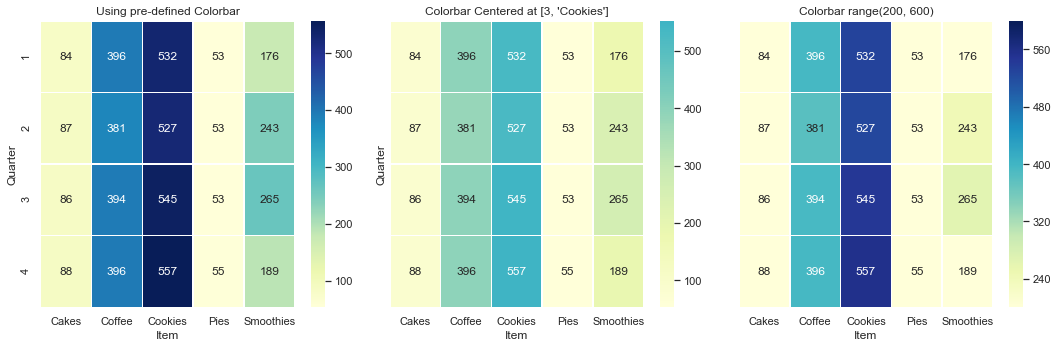

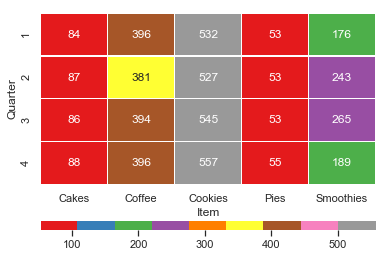

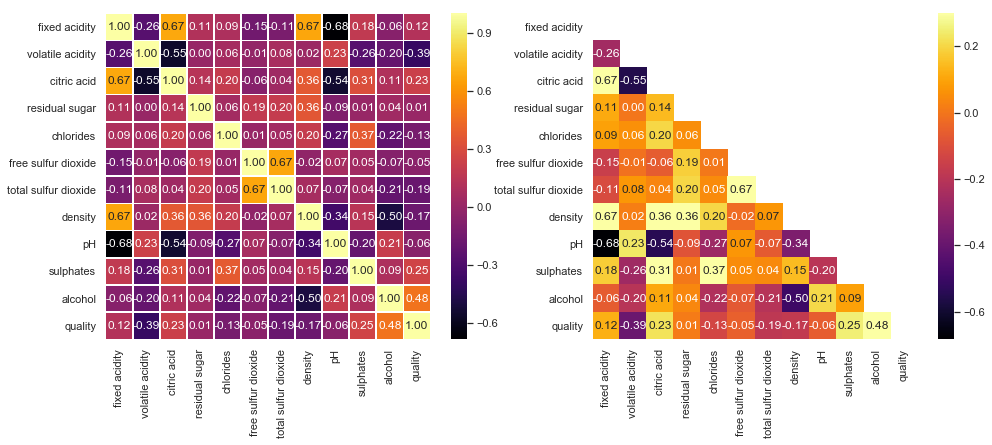

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')

# Prepare the data in matrix format with Quartes on rows and Items in columns
sales = pd.DataFrame(long_sales.groupby(["Item", "Quarter"]).Sales.mean())
sales = sales.reset_index()
sales = sales.pivot('Quarter','Item', 'Sales')
sales.head()

# Set up axes on which to plot various plots
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))

sns.heatmap(sales, annot=True, fmt='.0f',linewidths=.5, cmap="YlGnBu", ax=ax1)
ax1.set_title('Using pre-defined Colorbar')

sns.heatmap(sales, annot=True, fmt='.0f',linewidths=.5, robust=True,
            cmap="YlGnBu", center=sales.loc[3, 'Cookies'], yticklabels=False, ax=ax2)
ax2.set_title("Colorbar Centered at [3, 'Cookies']")

sns.heatmap(sales, annot=True, fmt='.0f',linewidths=.5, robust=True, vmin=200, vmax=600,
            cmap="YlGnBu", yticklabels=False, ax=ax3)
ax3.set(title='Colorbar range(200, 600)', ylabel='')

plt.tight_layout()
plt.show();

grid_kws = {"height_ratios": (.9, .05), "hspace": .4}
f, (plot_ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sns.heatmap(sales, ax=plot_ax, cmap="Set1", annot=True, fmt='.0f',linewidths=.5,
                 cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal"});

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6)) 
sns.heatmap(corr, annot=True, fmt='.2f',linewidths=.5, cmap="inferno", ax=ax1)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=.3, annot=True, fmt='.2f', cmap="inferno", ax=ax2)
plt.show();


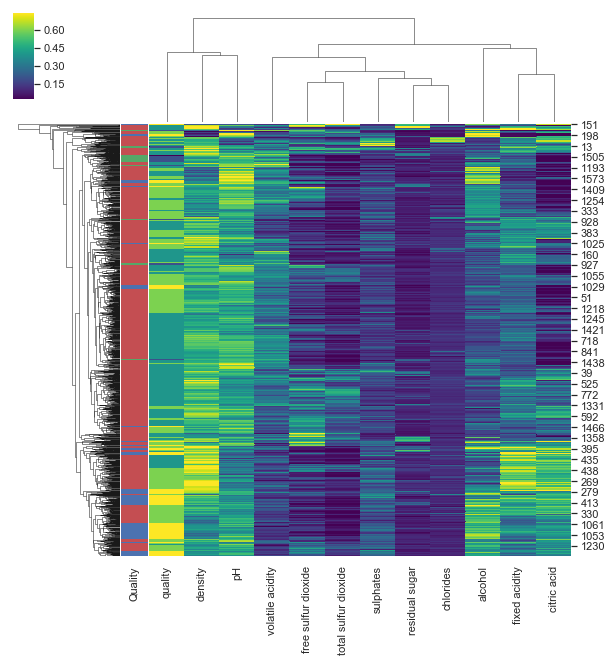

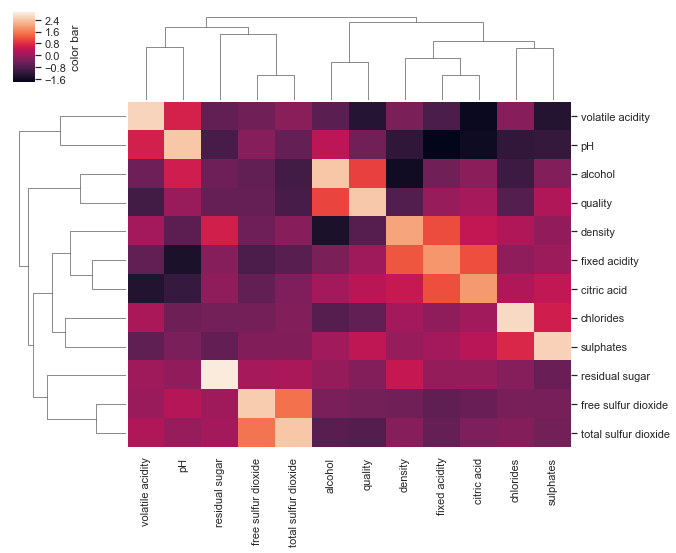

In [31]:
# metric options: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
# method options: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html 

row_colors = wine_quality["Quality"].map(dict(zip(wine_quality["Quality"].unique(), "rbg")))
g = sns.clustermap(wine_quality.drop('Quality',axis=1), standard_scale=1, robust=True,
                   row_colors=row_colors, cmap='viridis')

#row_index = g.dendrogram_row.reordered_ind
#col_index = g.dendrogram_col.reordered_ind

g = sns.clustermap(corr, figsize=(10,8),  z_score=1, cbar_kws={"label": "color bar"})